The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 
Data Set Description
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 
This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 
You need to build a model that can differentiate between comments and its categories.  
Refer to the data set file provided along with this. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [66]:
test = pd.read_csv("test.csv")
test.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
print("Train data shape is ",df.shape)
print("Test data shape is ",test.shape)

Train data shape is  (159571, 8)
Test data shape is  (153164, 2)


#### Checking for null values

In [5]:
print(df.isnull().sum())
print("---------------------------------------------------------------")
print(test.isnull().sum())

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
---------------------------------------------------------------
id              0
comment_text    0
dtype: int64


#### The dataset doesn't have any null values

#### Plotting count plot for each variables

<AxesSubplot:xlabel='malignant', ylabel='count'>

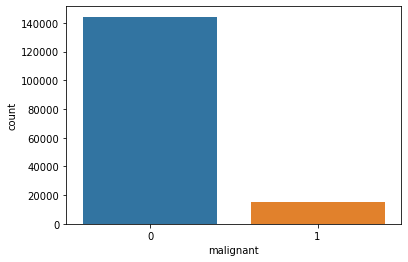

In [6]:
sns.countplot(df['malignant'])

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

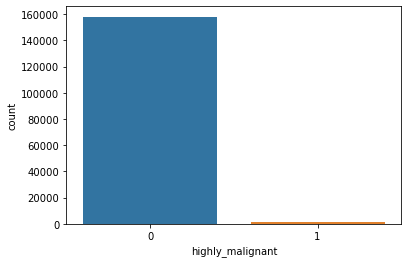

In [7]:
sns.countplot(df['highly_malignant'])

<AxesSubplot:xlabel='rude', ylabel='count'>

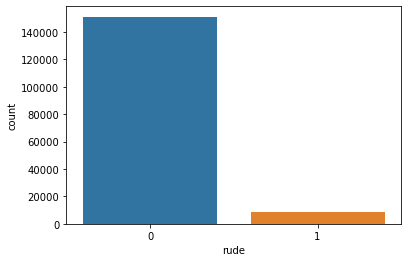

In [8]:
sns.countplot(df['rude'])

<AxesSubplot:xlabel='threat', ylabel='count'>

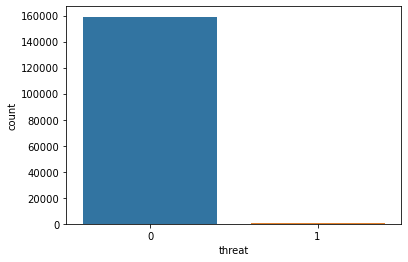

In [9]:
sns.countplot(df['threat'])

<AxesSubplot:xlabel='abuse', ylabel='count'>

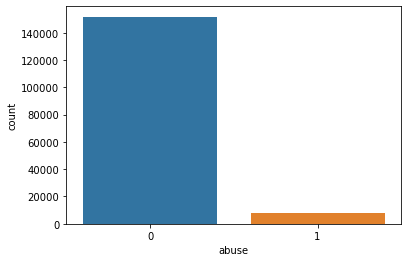

In [10]:
sns.countplot(df['abuse'])

<AxesSubplot:xlabel='loathe', ylabel='count'>

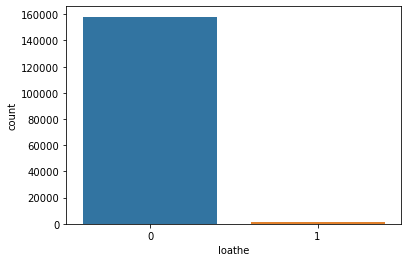

In [11]:
sns.countplot(df['loathe'])

#### Checking the correlation

In [12]:
df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


#### Importing wordnetlemmatizer and stopwords
Lemmatization : Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words

Stopwords: They are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. 

NLTK - Natural Language Toolkit. It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.
    

In [15]:
#Downloading wordnet
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [17]:
lem=WordNetLemmatizer()
df['comment_text'] = df['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(t) for t in x.split()))

#### Adding another feature as comment length

In [18]:
df['Comment_length'] = df['comment_text'].str.len()

In [19]:
df['Comment_length'].sum()

61859133

#### Creating a sense of loud words using wordcloud

Wordcloud : is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

In [22]:
!pip install wordcloud

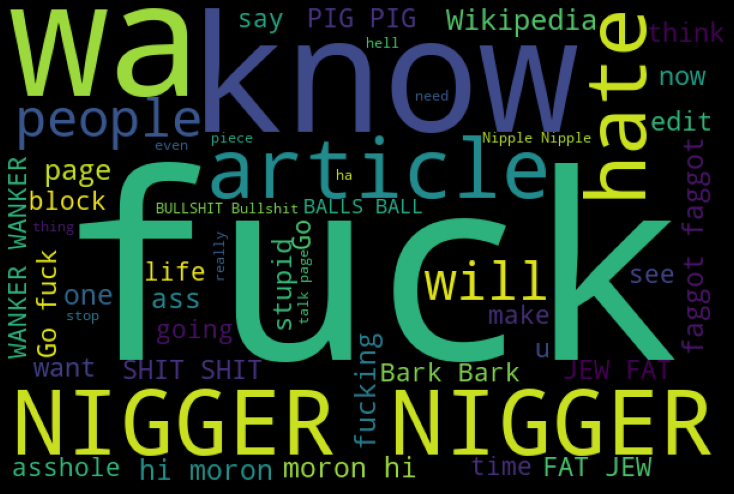

In [23]:
from wordcloud import WordCloud
words = df['comment_text'][df['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### The above diagram shows the most frequently used malignant words

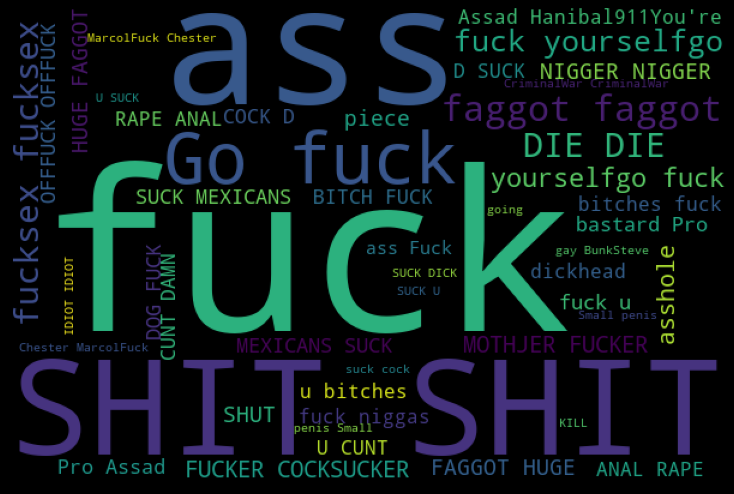

In [24]:
from wordcloud import WordCloud
words = df['comment_text'][df['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Above diagram shows highly malignant words used for commenting in social media platforms

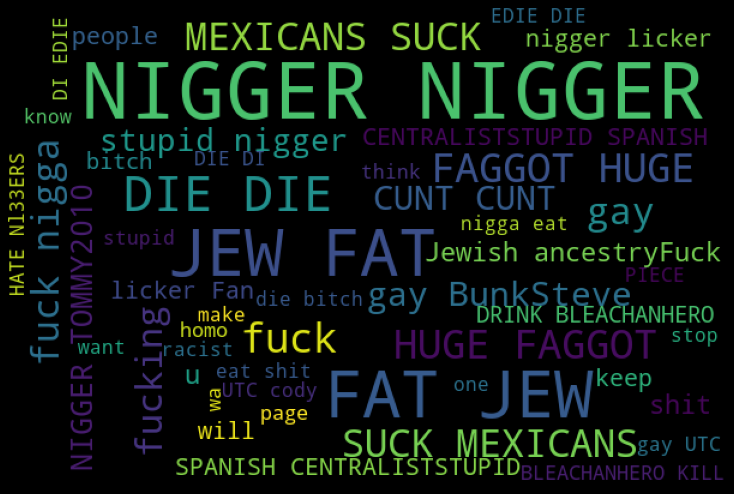

In [26]:
from wordcloud import WordCloud
words = df['comment_text'][df['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(words))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Above three diagrams gives a clue about the malignant words used for commenting in social media platforms

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

<AxesSubplot:title={'center':'Label distribution over comments'}, ylabel='count'>

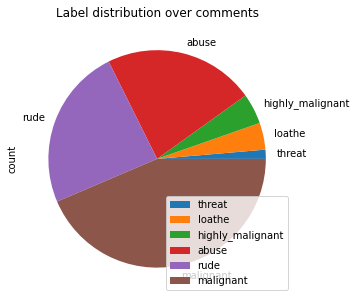

In [32]:
target_columns = ['malignant','highly_malignant','rude','threat','abuse','loathe']
distribution = df[target_columns].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

distribution.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5))

In [34]:
target_data = df[target_columns]
df['bad'] =df[target_columns].sum(axis =1)
print(df['bad'].value_counts())
df['bad'] = df['bad'] > 0 
df['bad'] = df['bad'].astype(int)
print(df['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


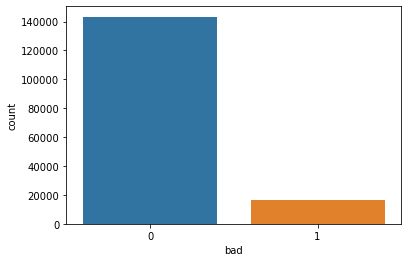

In [36]:
#Plotting a countplot
sns.countplot(x="bad" , data = df)
plt.show()

#### Comment_text is going to the input ie x, using that we should predict to which category does the comment belongs to. 
#### So converting text to vector by TF-IDF method. 
           where TF is Term Frequency - This summarizes how often a given word appears within a document.
           and IDF is Inverse Document Frequency - This downscales words that appear a lot across documents.
ie. TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
feature = tf_vec.fit_transform(df['comment_text'])
x = feature

In [38]:
y=df['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

##### Model Training

i) Logistic Regression

In [41]:
lg = LogisticRegression()

lg.fit(x_train, y_train)

y_pred_train = lg.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

y_pred_test = lg.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9594982945236752
Test accuracy is 0.9550050133689839
[[42736   214]
 [ 1940  2982]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     42950
           1       0.93      0.61      0.73      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



ii) Decision Tree Classifier

In [43]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)
y_pred_train = dt.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

y_pred_test = dt.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990420684160108
Test accuracy is 0.94061246657754
[[41615  1335]
 [ 1508  3414]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42950
           1       0.72      0.69      0.71      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.84     47872
weighted avg       0.94      0.94      0.94     47872



iii) Random Forest Classifier

In [44]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

y_pred_test = rf.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990152105211327
Test accuracy is 0.9558405748663101
[[42427   523]
 [ 1591  3331]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.86      0.68      0.76      4922

    accuracy                           0.96     47872
   macro avg       0.91      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



iv)XGBoost

In [46]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)

y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[13:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy is 0.9615215892711663
Test accuracy is 0.9522894385026738
[[42679   271]
 [ 2013  2909]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.91      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.93      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



v) AdaBoost

In [47]:
ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9468750839309215
Test accuracy is 0.9456467245989305
[[42580   370]
 [ 2232  2690]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.55      0.67      4922

    accuracy                           0.95     47872
   macro avg       0.91      0.77      0.82     47872
weighted avg       0.94      0.95      0.94     47872



vi) KNN

In [48]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9279939838315473
Test accuracy is 0.9167362967914439
[[42655   295]
 [ 3691  1231]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     42950
           1       0.81      0.25      0.38      4922

    accuracy                           0.92     47872
   macro avg       0.86      0.62      0.67     47872
weighted avg       0.91      0.92      0.90     47872



##### Finding cross validation score

In [49]:
cvs=cross_val_score(lg, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)

cross validation score : 95.64081040958374


In [50]:
cvs=cross_val_score(dt, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)

cross validation score : 94.12111230470931


In [51]:
cvs=cross_val_score(rf, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)

cross validation score : 95.64582439381537


In [52]:
cvs=cross_val_score(xgb, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)

[15:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:31:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:34:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [53]:
cvs=cross_val_score(ada, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)

cross validation score : 94.58861429061652


In [54]:
cvs=cross_val_score(knn, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)

cross validation score : 91.34617149235895


#### Finding the best model

In [55]:
model = pd.DataFrame([["Logistic Regression","95.50","95.64","0.14"],["DecisionTreeClassifier","94.06","94.12","0.06"],["RandomForestClassifier",'95.56',"95.65","0.09"],["XGBoostClassifier","95.23","95.36","0.13"],['Adaboost','94.56','94.59','0.03'],['KNN','91.67','91.35','0.32']],columns=["Model","Accuracy","Cross Validation Score","Difference"])
model

,Model,Accuracy,Cross Validation Score,Difference
0,Logistic Regression,95.50,95.64,0.14
1,DecisionTreeClassifier,94.06,94.12,0.06
2,RandomForestClassifier,95.56,95.65,0.09
3,XGBoostClassifier,95.23,95.36,0.13
4,Adaboost,94.56,94.59,0.03
5,KNN,91.67,91.35,0.32


#### Adaboost turns out to be the best model

In [57]:
from sklearn.model_selection import GridSearchCV
params = {'learning_rate':np.arange(0.05,0.2),
          'n_estimators':[10,200,10],
         }
grid = GridSearchCV(estimator = ada,param_grid = params,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'learning_rate': 0.05, 'n_estimators': 200}


In [60]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))

y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))

print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9514767365867197
Test accuracy is 0.9496991978609626
[[42554   396]
 [ 2012  2910]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.59      0.71      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.79      0.84     47872
weighted avg       0.95      0.95      0.95     47872



#### After HPT accuracy increased by 94.97%

#### Plotting ROC-AUC Curve

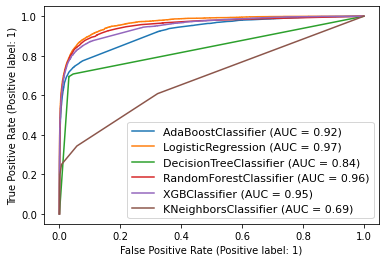

In [63]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(ada,x_test,y_test)
plot_roc_curve(lg,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### The higher accuracy can be due to over fitting so taking Adaboost as the best model because the difference is least for adaboost model

#### Making the prediction

##### Converting text into vectors

In [67]:
lem=WordNetLemmatizer()
test['comment_text'] = test['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(t) for t in x.split()))

In [68]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2972745 stored elements in Compressed Sparse Row format>

In [69]:
prediction=ada.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
import pickle
filename = 'comment_prediction.pkl'
pickle.dump(ada,open(filename,'wb'))